## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_17-27-04-23.csv', firstRow=342, lastRow=348)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_240423_S343-348.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=74s and ended at t=428s; mass=43.39490000000001g
This equals a volume of 43.482m; expected was 44.02mL; error is 1.222%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0027500000000000003 g/s and for 2nd derivative = 0.0006875000000000001 g/s^2


<IPython.core.display.Javascript object>


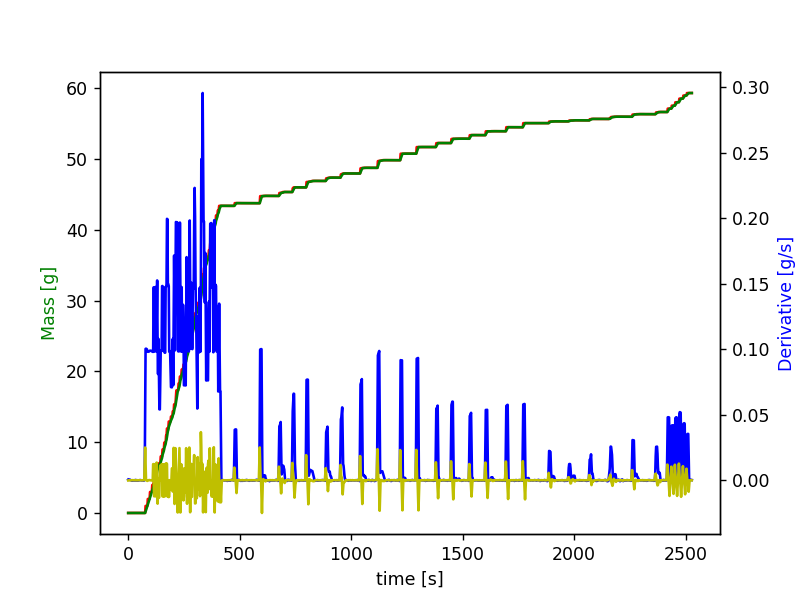

Addition of 0.385g Texapon SB 3 KC detected from 472s to 492s - expected volume = 0.727mL and actual volume = 0.345mL (resulting error is 52.537%)
Addition of 1.034g Plantapon ACG 50 detected from 586s to 620s - expected volume = 0.993mL and actual volume = 0.916mL (resulting error is 7.779%)
Addition of 0.551g Plantapon LC 7 detected from 672s to 708s - expected volume = 0.599mL and actual volume = 0.523mL (resulting error is 12.631%)
Addition of 0.656g Plantapon LC 7 detected from 732s to 756s - expected volume = 0.599mL and actual volume = 0.623mL (resulting error is 3.962%)
Addition of 0.915g Plantapon LC 7 detected from 794s to 838s - expected volume = 0.91mL and actual volume = 0.858mL (resulting error is 5.747%)
Addition of 0.472g Plantacare 818 detected from 882s to 916s - expected volume = 0.511mL and actual volume = 0.434mL (resulting error is 15.072%)
Addition of 0.59g Plantacare 818 detected from 948s to 976s - expected volume = 0.511mL and actual volume = 0.543mL (resultin

In [3]:
# default: bl_mult=5, mergeSens=10
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00375 g/s and for 2nd derivative = 0.0008593749999999999 g/s^2


<IPython.core.display.Javascript object>


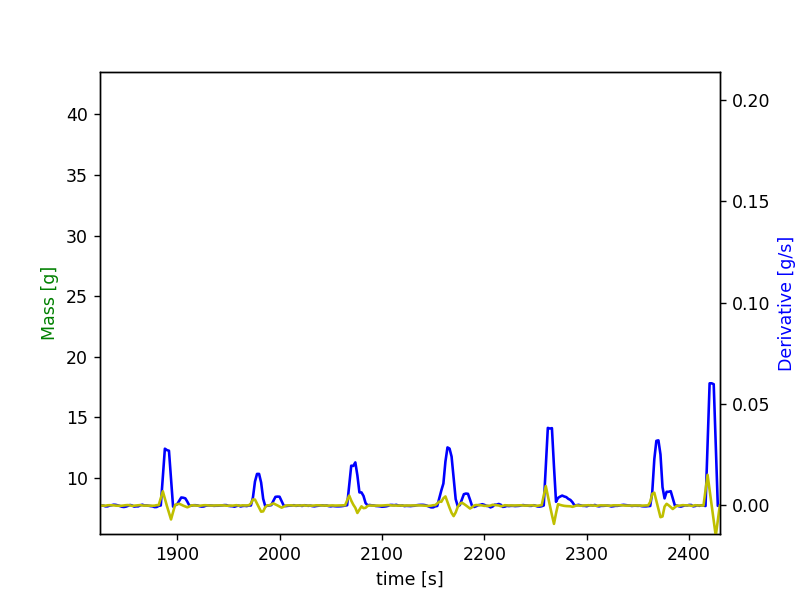

Addition of 0.248g Dehyquart CC7 Benz detected from 1882s to 1914s - expected volume = 0.216mL and actual volume = 0.246mL (resulting error is 13.647%)
Addition of 0.156g Dehyquart CC7 Benz detected from 1970s to 2006s - expected volume = 0.113mL and actual volume = 0.153mL (resulting error is 35.761%)
Addition of 0.208g Dehyquart CC7 Benz detected from 2064s to 2088s - expected volume = 0.156mL and actual volume = 0.205mL (resulting error is 31.646%)
Addition of 0.321g Dehyquart CC7 Benz detected from 2152s to 2192s - expected volume = 0.265mL and actual volume = 0.313mL (resulting error is 18.107%)
Addition of 0.362g Dehyquart CC7 Benz detected from 2256s to 2284s - expected volume = 0.274mL and actual volume = 0.358mL (resulting error is 30.351%)
Addition of 0.308g Dehyquart CC7 Benz detected from 2360s to 2390s - expected volume = 0.26mL and actual volume = 0.306mL (resulting error is 17.605%)


In [5]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.00875 g/s and for 2nd derivative = 0.00375 g/s^2


<IPython.core.display.Javascript object>


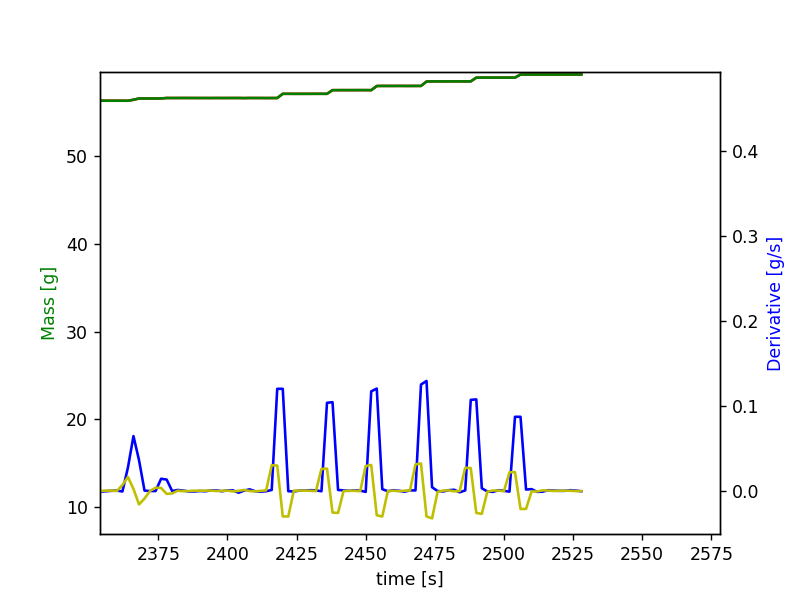

Addition of 0.478g Arlypon F detected from 2414s to 2426s - expected volume = 0.538mL and actual volume = 0.548mL (resulting error is 1.702%)
Addition of 0.421g Arlypon F detected from 2432s to 2444s - expected volume = 0.456mL and actual volume = 0.476mL (resulting error is 4.467%)
Addition of 0.479g Arlypon F detected from 2448s to 2460s - expected volume = 0.52mL and actual volume = 0.545mL (resulting error is 4.814%)
Addition of 0.516g Arlypon F detected from 2466s to 2478s - expected volume = 0.558mL and actual volume = 0.58mL (resulting error is 3.823%)
Addition of 0.432g Arlypon F detected from 2484s to 2496s - expected volume = 0.467mL and actual volume = 0.492mL (resulting error is 5.366%)
Addition of 0.353g Arlypon F detected from 2500s to 2512s - expected volume = 0.378mL and actual volume = 0.404mL (resulting error is 6.97%)


In [6]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_240423_S337-S342.csv', index=False)
actualMassFractions